In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

In [ ]:
df=pd.read_csv('D:\\Downloads\\alzheimers.csv',index_col=0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 373 entries, OAS2_0001 to OAS2_0186
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MRI ID    373 non-null    object 
 1   Group     373 non-null    object 
 2   Visit     373 non-null    int64  
 3   MR Delay  373 non-null    int64  
 4   M/F       373 non-null    object 
 5   Hand      373 non-null    object 
 6   Age       373 non-null    int64  
 7   EDUC      373 non-null    int64  
 8   SES       354 non-null    float64
 9   MMSE      371 non-null    float64
 10  CDR       373 non-null    float64
 11  eTIV      373 non-null    int64  
 12  nWBV      373 non-null    float64
 13  ASF       373 non-null    float64
dtypes: float64(5), int64(5), object(4)
memory usage: 43.7+ KB


In [ ]:
df.head(5)

,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
Subject ID,,,,,,,,,,,,,,
OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [ ]:
df['M/F'].replace(['M', 'F'], [0, 1], inplace=True)

In [ ]:
df.dropna(inplace=True,axis=1)

In [ ]:
df.drop(['MRI ID','Hand'], axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 373 entries, OAS2_0001 to OAS2_0186
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Group     373 non-null    object 
 1   Visit     373 non-null    int64  
 2   MR Delay  373 non-null    int64  
 3   M/F       373 non-null    int64  
 4   Age       373 non-null    int64  
 5   EDUC      373 non-null    int64  
 6   CDR       373 non-null    float64
 7   eTIV      373 non-null    int64  
 8   nWBV      373 non-null    float64
 9   ASF       373 non-null    float64
dtypes: float64(3), int64(6), object(1)
memory usage: 32.1+ KB


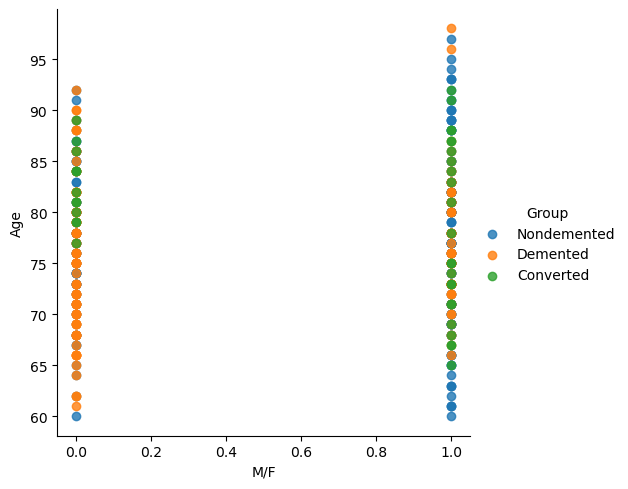

In [ ]:
import seaborn as sns
sns.lmplot(x='M/F',y='Age',data=df,hue='Group',fit_reg=False)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


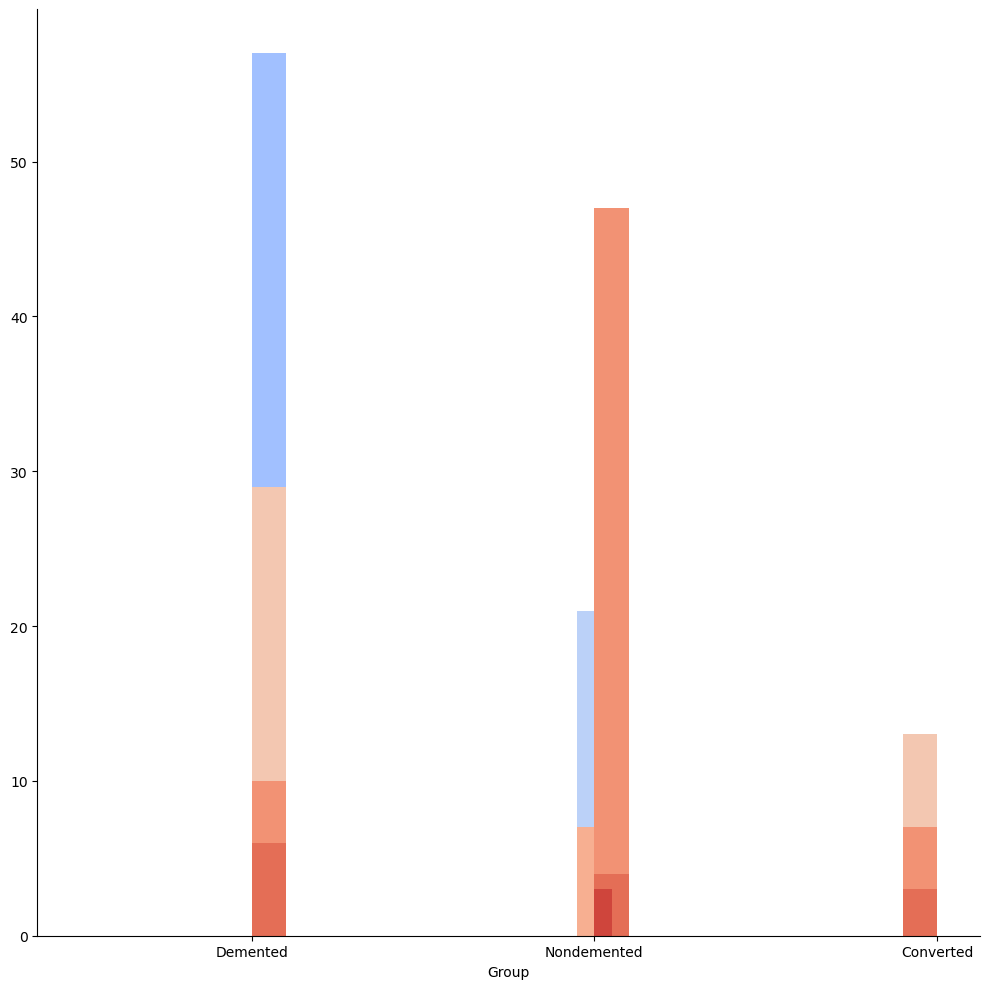

In [ ]:
g=sns.FacetGrid(df,hue='EDUC',palette='coolwarm',size=10, aspect=1)
g=g.map(plt.hist,'Group',bins=20,alpha=1)

In [ ]:
data=df.drop('Group',axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 373 entries, OAS2_0001 to OAS2_0186
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Visit     373 non-null    int64  
 1   MR Delay  373 non-null    int64  
 2   M/F       373 non-null    int64  
 3   Age       373 non-null    int64  
 4   EDUC      373 non-null    int64  
 5   CDR       373 non-null    float64
 6   eTIV      373 non-null    int64  
 7   nWBV      373 non-null    float64
 8   ASF       373 non-null    float64
dtypes: float64(3), int64(6)
memory usage: 37.2+ KB


In [ ]:
df.dropna(inplace=True,axis=1)

In [ ]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2)
kmeans.fit(data)

KMeans(n_clusters=2)

In [ ]:
kmeans.cluster_centers_

array([[1.50354610e+00, 2.94698582e+02, 5.85106383e-01, 7.63936170e+01,
        1.44645390e+01, 3.17375887e-01, 1.47440426e+03, 7.30953901e-01,
        1.20634397e+00],
       [3.05494505e+00, 1.52603297e+03, 5.27472527e-01, 7.89340659e+01,
        1.50109890e+01, 2.08791209e-01, 1.53065934e+03, 7.25274725e-01,
        1.16173626e+00]])

In [ ]:
kmeans.labels_

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,

In [ ]:
def converter(Group):
    if Group=='Demented':
        return 0
    if Group=='Nondemented':
        return 1
    else:
        return 2

In [ ]:
data['Cluster']=df['Group'].apply(converter)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(data['Cluster'],kmeans.labels_))
print(confusion_matrix(data['Cluster'],kmeans.labels_))

              precision    recall  f1-score   support

           0       0.45      0.87      0.59       146
           1       0.65      0.31      0.42       190
           2       0.00      0.00      0.00        37

    accuracy                           0.50       373
   macro avg       0.37      0.39      0.34       373
weighted avg       0.51      0.50      0.45       373

[[127  19   0]
 [131  59   0]
 [ 24  13   0]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from scipy.spatial.distance import cdist
data=data.drop('Cluster',axis=1)

In [ ]:
data.shape[0]

373

In [ ]:
distortion=[]
K=range(2,10)
for k in K:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(data)
    mse=sum(np.min(cdist(data,kmeans.cluster_centers_,
                         'euclidean'),axis=1))/data.shape[0]
    distortion.append(mse)

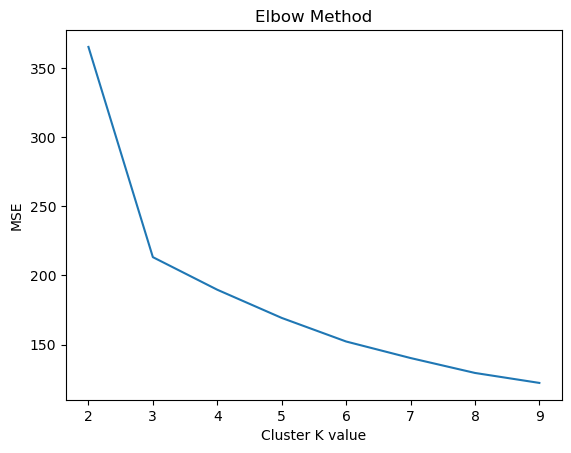

In [ ]:
plt.plot(K,distortion)
plt.xlabel('Cluster K value')
plt.ylabel('MSE')
plt.title('Elbow Method')
plt.show()